## Binary Segmentation Model (Fruit vs. Background)

imports

In [1]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

Making sure that both sets have the same fruit types

In [2]:
trainFruits=os.listdir('Project Data/Fruit/Train')
testFruits=os.listdir('Project Data/Fruit/Validation')

In [3]:
assert set(trainFruits) == set(testFruits), "Train and Test folders must have the same fruit categories"

### Read all the filenames first to shuffle them before generating a batch

In [4]:
fruits = trainFruits  
all_file_pairs = []

for fruit in fruits:
    image_dir = f'Project Data/Fruit/Train/{fruit}/Images'
    mask_dir = f'Project Data/Fruit/Train/{fruit}/Mask'
    
    filenames = os.listdir(image_dir)
    
    for filename in filenames:
        img_path = os.path.join(image_dir, filename)
        
        mask_filename = f"{filename.split('.')[0]}_mask.png"
        mask_path = os.path.join(mask_dir, mask_filename)
        
        all_file_pairs.append((img_path, mask_path))

random.shuffle(all_file_pairs)

Size of the dataset

In [5]:
len(all_file_pairs)

1759

Helper function

In [6]:
def read_and_process_image(path,size=(224,224)):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, size)
    image = image / 255.0
    return image

In [7]:
def read_and_process_mask(path,size=(224,224)):
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, size,interpolation=cv2.INTER_NEAREST)
    mask = mask / 255.0
    mask = np.expand_dims(mask, axis=-1)
    return mask

Batch generator

In [8]:
def get_batch(file_pairs, batch_size):
    L = len(file_pairs)
    random.shuffle(file_pairs) # shuffle each epoch
    
    for start in range(0, L, batch_size):
        end = min(start + batch_size, L)
        current_batch_pairs = file_pairs[start:end]
        
        x_batch = []
        y_batch = []
        
        for img_p, mask_p in current_batch_pairs:
            img = read_and_process_image(img_p)
            x_batch.append(img)
            
            mask = read_and_process_mask(mask_p)
            y_batch.append(mask)
        
        yield np.array(x_batch), np.array(y_batch)

### Plot a batch of images and masks

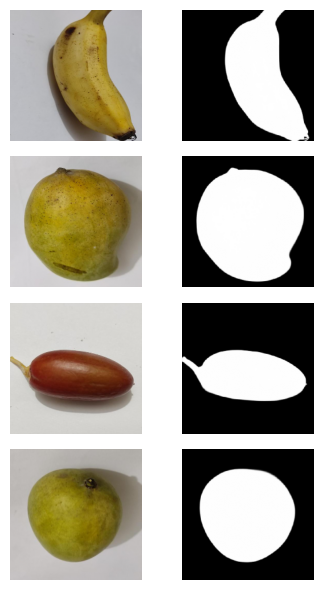

In [12]:
for x, y in get_batch(all_file_pairs, 4):
    
    plt.figure(figsize=(4,6))
    
    for i in range(len(x)):
        
        plt.subplot(len(x), 2, 2*i + 1)
        plt.imshow(x[i])
        plt.axis("off")
        
        plt.subplot(len(x), 2, 2*i + 2)
        plt.imshow(y[i].squeeze(), cmap='gray', vmin=0, vmax=1)
        plt.axis("off")
        
    plt.tight_layout()
    plt.show()
    
    break